# House Price Prediction - A Regression Problem
In this project, we tackle the problem of predicting house prices using supervised machine learning techniques. Leveraging a variety of regression algorithms, we aim to model the relationship between house features and their market value. Our objective is to build accurate, generalizable models that can effectively predict prices on unseen data.
#### Used models :
- Linear Regression
- Random Forest
- Ridge Regressor
- Lasso Regressor
- Decision Tree
- CatBoost
- XGBoost


### Data Importation and initial glance

In [151]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [152]:
od.download(
    "https://www.kaggle.com/datasets/yasserh/housing-prices-dataset")

Skipping, found downloaded files in ".\housing-prices-dataset" (use force=True to force download)


In [153]:
df = pd.read_csv("housing-prices-dataset/Housing.csv") 
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [154]:
df.shape #checking the dimenstions of the dataset

(545, 13)

In [155]:
df.info() #general informations about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [156]:
df.isnull().sum() #checking the sum of null values in each column

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [157]:
df.isna().any() #checking for null values too

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool

In [158]:
df.duplicated().sum() #checking the number of duplicated values

0

In [159]:
df.describe () # a genral descrition of the dataset 

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### EDA

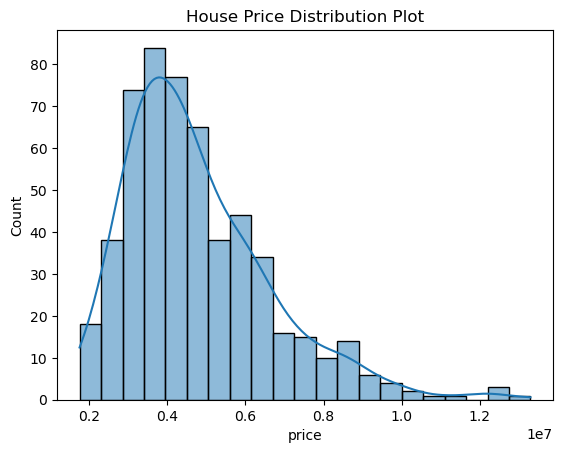

In [161]:
plt.figure()
plt.title('House Price Distribution Plot')
sns.histplot(df.price, kde=True)
plt.show()
# plotting a figure showcasing the distribution of the house prices. `kde= True` is used to plot the curve on the histogram

In [162]:
categorical_list = [x for x in df.columns if df[x].dtype =='object']
print(categorical_list)
#making a list for the columns of the categorical data

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


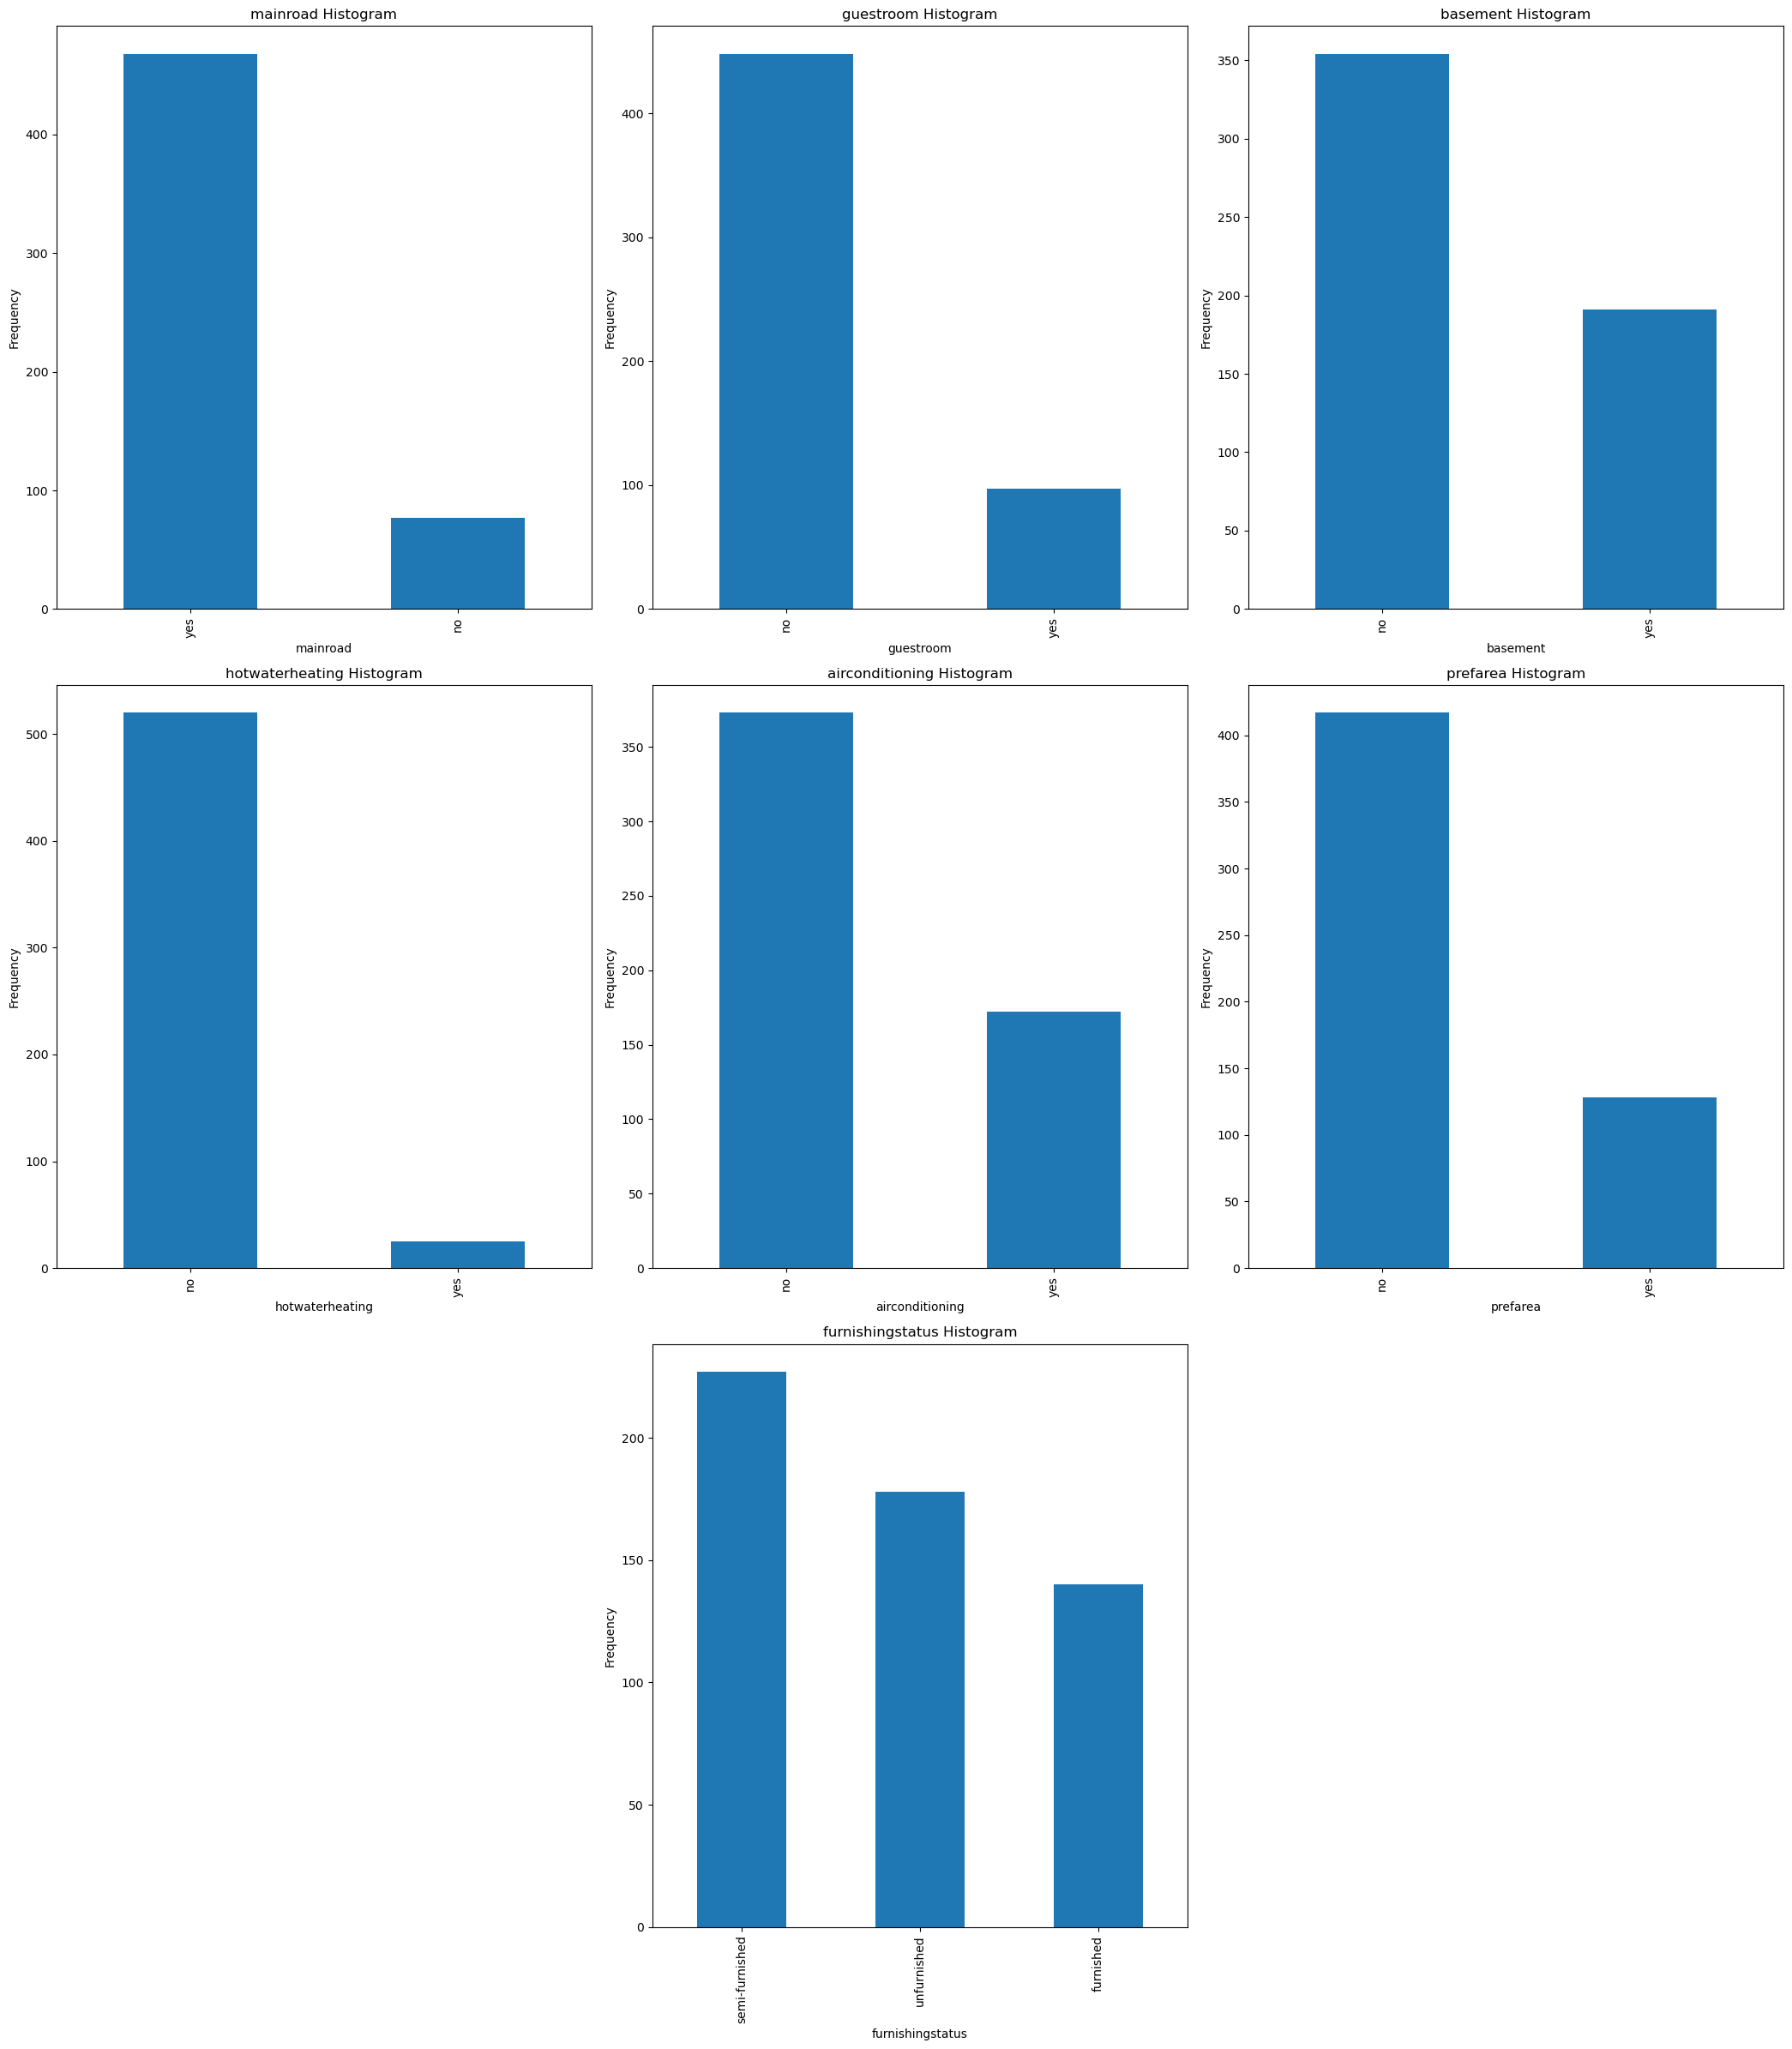

In [163]:
plt.figure(figsize=(21,24)) # creates a new figure,figsize=(21,24) is used to set the dimensions of the figure to be 21 units wide and 24 units tall

# plotting figures showcasing the distribution of some features

plt.subplot(3, 3, 1)
plt1 = df['mainroad'].value_counts().plot(kind='bar')
plt.title('mainroad Histogram')
plt1.set(xlabel='mainroad', ylabel='Frequency')

plt.subplot(3, 3, 2)
plt1 = df['guestroom'].value_counts().plot(kind='bar')
plt.title('guestroom Histogram')
plt1.set(xlabel='guestroom', ylabel='Frequency')

plt.subplot(3, 3, 3)
plt1 = df['basement'].value_counts().plot(kind='bar')
plt.title('basement Histogram')
plt1.set(xlabel='basement', ylabel='Frequency')

plt.subplot(3, 3, 4)
plt1 = df['hotwaterheating'].value_counts().plot(kind='bar')
plt.title('hotwaterheating Histogram')
plt1.set(xlabel='hotwaterheating', ylabel='Frequency')

plt.subplot(3, 3, 5)
plt1 = df['airconditioning'].value_counts().plot(kind='bar')
plt.title('airconditioning Histogram')
plt1.set(xlabel='airconditioning', ylabel='Frequency')

plt.subplot(3, 3, 6)
plt1 = df['prefarea'].value_counts().plot(kind='bar')
plt.title('prefarea Histogram')
plt1.set(xlabel='prefarea', ylabel='Frequency')

plt.subplot(3, 3, 8) 
plt1 = df['furnishingstatus'].value_counts().plot(kind='bar')
plt.title('furnishingstatus Histogram')
plt1.set(xlabel='furnishingstatus', ylabel='Frequency')

plt.tight_layout() #function that automatically adjusts the padding between subplots and figure edges to prevent labels, titles, or other elements from overlapping.
plt.show()

In [164]:
numerical_list = [x for x in df.columns if df[x].dtype in ('int64','float64')]
print(numerical_list)
# making a list for the numerical values, the values that are either int64 or float64

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


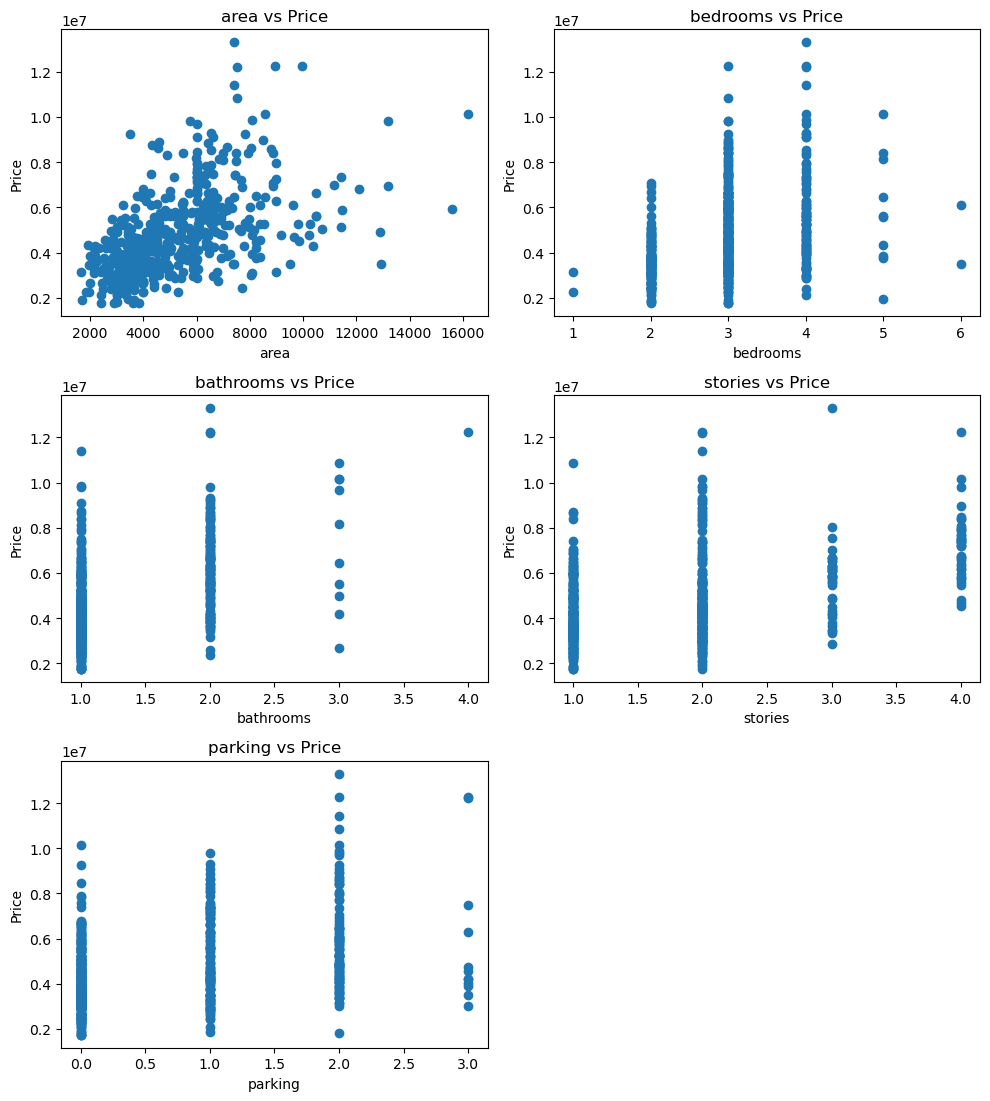

In [165]:
def scatter(x,fig): #Creates a scatter plot of a given feature (x) against 'price' in a subplot.
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,18)) #initialising the figure

scatter('area', 1)
scatter('bedrooms', 2)
scatter('bathrooms', 3)
scatter('stories', 4)
scatter('parking',5)

plt.tight_layout()

In [166]:
# sns.pairplot(df) # creates a grid of scatter plots and histograms to visualize pairwise relationships and distributions in a dataset.
# plt.show()

              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


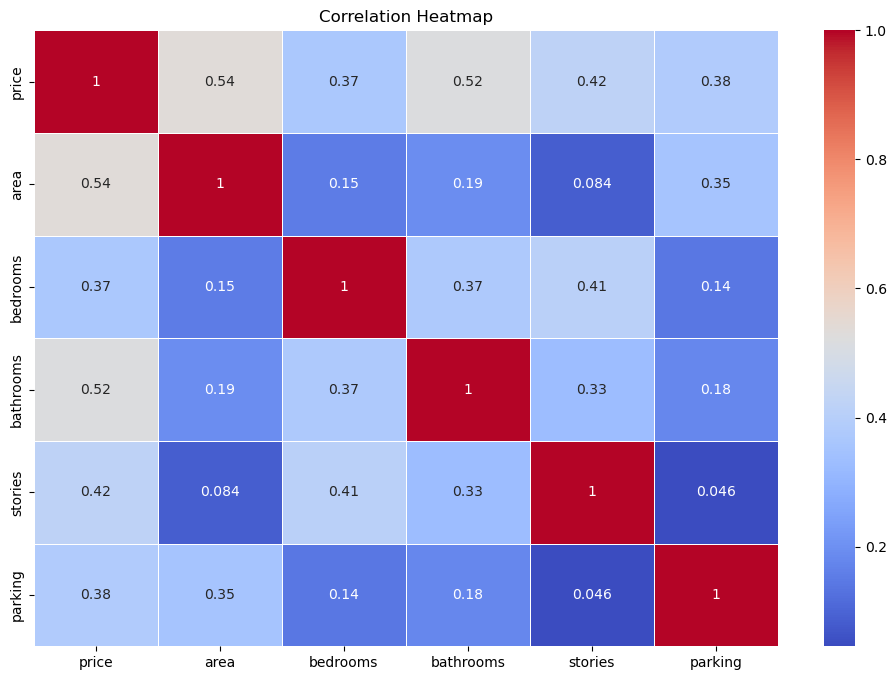

In [167]:
cor_matrix= df[numerical_list].corr() #computes the correlation matrix between numerical columns in a DataFrame (correlation goes from -1 to 1)
print (cor_matrix)
plt.figure(figsize=(12, 8)) 
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5) #creating a heatmap based on the the correlation matrix
plt.title('Correlation Heatmap')
plt.show()

#### **One-Hot Encoding: Converting Categorical Variables into Dummies**

In order to use categorical features in machine learning models, we need to convert them into a numerical format. One common approach is **One-Hot Encoding**, where each category of a feature is converted into a separate binary column (dummy variable). 

For a categorical variable with **n unique values**, One-Hot Encoding creates **n binary columns**, but **only (n − 1)** are needed to avoid **multicollinearity** (also called the "dummy variable trap"). The `drop_first=True` parameter in `pd.get_dummies()` automatically drops the first category, ensuring that the encoded variables are linearly independent.

---

### 🔧 `dummies()` Function Description

This custom function:
1. Takes a categorical column `x` from the dataframe `df`.
2. Uses `pd.get_dummies()` to generate dummy variables, dropping the first category.
3. Concatenates the resulting dummy columns back to the original dataframe.
4. Drops the original categorical column (since it's now encoded).
5. Returns the updated dataframe.

---

### Why Drop One Dummy Column?

If all `n` dummies are kept, one of them becomes redundant—it can be derived from the others. This redundancy causes problems for linear models (e.g., Linear Regression), where the design matrix must have linearly independent features. By removing one dummy column, we avoid this trap without losing any information.

---

> Example:  
> If a column `Color` has values `['Red', 'Blue', 'Green']`, One-Hot Encoding will produce:
>
> - `Color_Blue`  
> - `Color_Green`  
> (No `Color_Red`—it's the reference category and can be inferred if both Blue and Green are 0)


In [169]:
def dummies(x,df):
    # Create dummy variables (One-Hot Encoding) for column 'x', drop first category to avoid redundancy
    # Dummy variables are binary (0/1) variables created to represent categorical data numerically so they can be used in statistical models.
    temp = pd.get_dummies(df[x], prefix=x, drop_first=True).astype(int)
    
    # Add new dummy columns to original dataframe
    df = pd.concat([df, temp], axis = 1)
    
    # Remove original categorical column
    df.drop([x], axis = 1, inplace = True)
    return df

In [170]:
# Split the dataset into training and test sets (80% train, 20% test) with a fixed random state for reproducibility
df_train, df_test = train_test_split(df, train_size=0.80, test_size=0.20, random_state=100)

# Apply one-hot encoding to categorical columns for both training and test sets
# The custom `dummies()` function creates dummy variables and drops the original column
for col in ['mainroad', 'guestroom', 'hotwaterheating', 'basement', 'airconditioning', 'prefarea', 'furnishingstatus']:
    df_train = dummies(col, df_train)
    df_test = dummies(col, df_test)

# Align the test set columns with the training set
# If the test set is missing any dummy columns (e.g., due to no occurrence of a certain category),
# `reindex` ensures the test set has the same columns, filling missing ones with zeros
df_test = df_test.reindex(columns=df_train.columns, fill_value=0)


In [171]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [172]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,hotwaterheating_yes,basement_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,0,0
41,7840000,6360,3,2,4,0,1,0,0,0,1,1,0,0
91,6419000,6750,2,1,1,2,1,1,0,1,0,1,0,0
118,5950000,6420,3,1,1,0,1,0,0,1,1,1,0,0
472,3010000,3630,4,1,2,3,1,0,0,0,0,0,1,0


In [173]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,hotwaterheating_yes,basement_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
265,4403000,2880,3,1,2,0,1,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,1,0,0,1,0,1,0
171,5250000,10269,3,1,1,1,1,0,0,0,0,1,1,0
244,4550000,5320,3,1,2,0,1,1,0,1,0,1,1,0
268,4382000,4950,4,1,2,0,1,0,0,0,1,0,1,0


In [174]:
df = dummies('mainroad',df)
df = dummies('guestroom',df)
df = dummies('hotwaterheating',df)
df = dummies('basement',df)
df = dummies('airconditioning',df)
df = dummies('prefarea',df)
df = dummies('furnishingstatus',df)

In [175]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,hotwaterheating_yes,basement_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,0,1,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,0,1,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,0,1,1,0,0,0


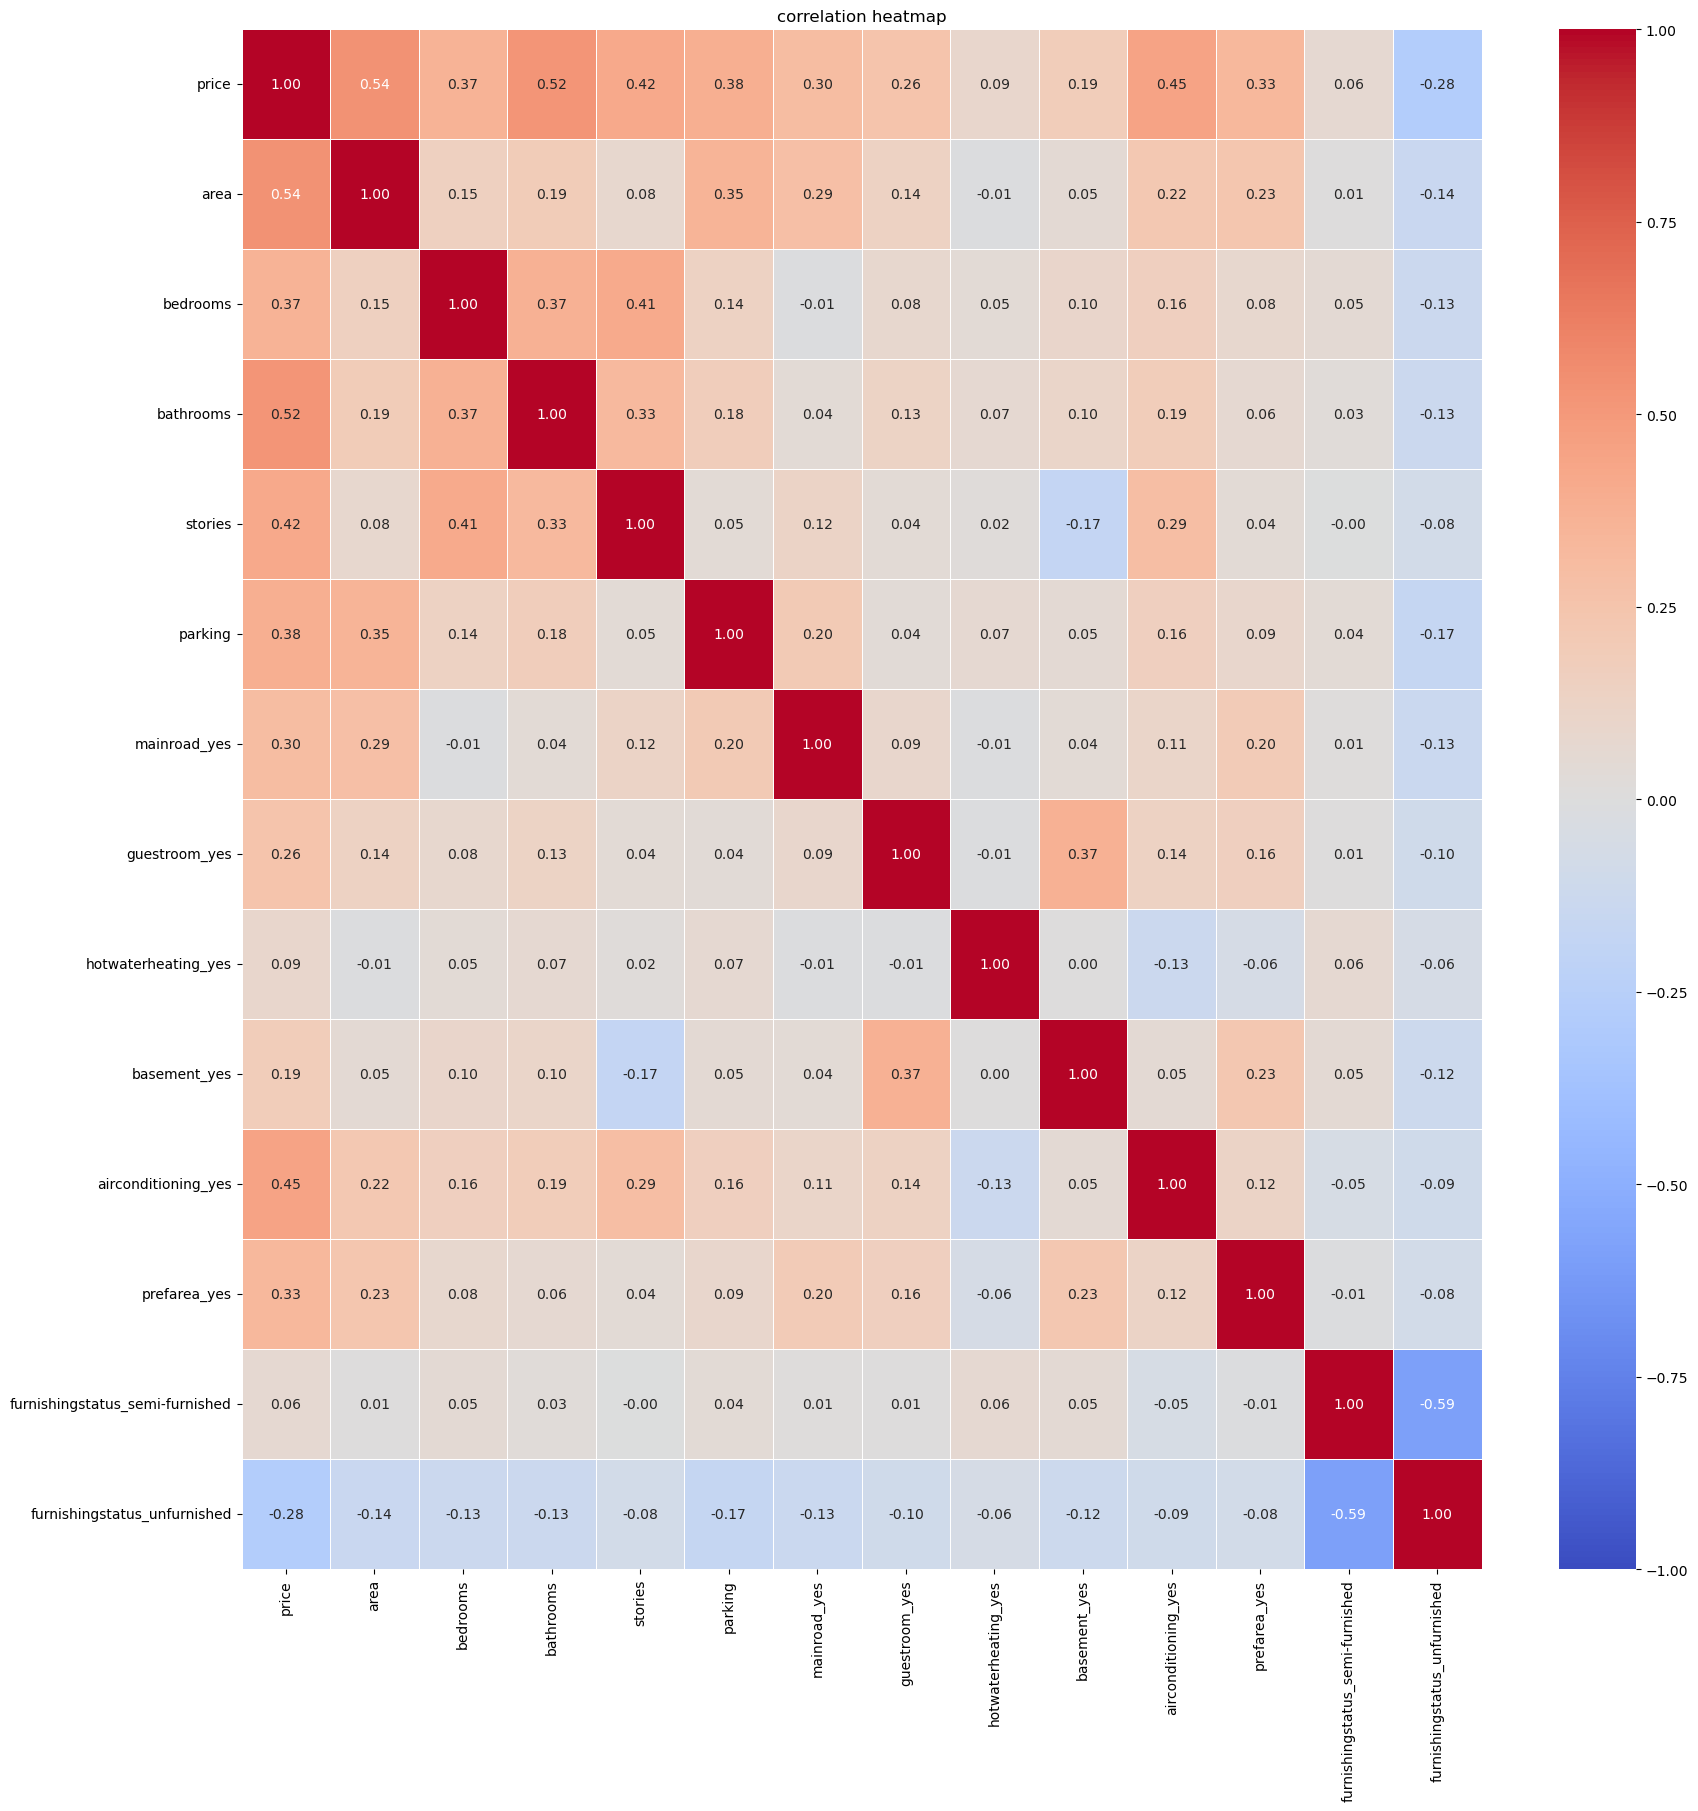

In [176]:
correlation_matrix = df.corr()
# correlation matrix with the dummy variables
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix , annot= True , cmap = 'coolwarm' , vmin=-1 , vmax= 1 , fmt = '.2f' , linewidths = 0.5)
plt.title('correlation heatmap')
plt.show()

In [177]:
# Separate target from features to prepare data for supervised learning
y_train = df_train.pop('price')  # Extract target variable first to avoid data leakage
X_train = df_train  # Use remaining columns as features (model inputs)

# Apply identical processing to test set to ensure consistency
y_test = df_test.pop('price')  # Preserve same target column name
X_test = df_test  # Maintain same feature structure as training data

In [178]:
X_test_aligned = X_test.reindex(columns=X_train.columns, fill_value=0)

In [179]:
# Removing ouliers
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for col in numerical_cols:
    q01 = df[col].quantile(0.01) # Calculate 1st percentile of the dataframe 
    q99 = df[col].quantile(0.99) # Calculate 99th percentile of the dataframe 
    
    X_train[col] = X_train[col].clip(lower=q01, upper=q99) #Removing the outlier of the 1st percentile 
    X_test[col] = X_test[col].clip(lower=q01, upper=q99) #Removing the outlier of the 99th percentile

print("Handling outliers...")

Handling outliers...


#### **Method for Adding Features to a Machine Learning Pipeline**  - Accuracy didn't change so I've commented them out

Feature engineering, the process of creating new input features from existing data, is a crucial step in improving a model’s performance. However, to ensure these features actually benefit the pipeline and avoid introducing bias or leakage, a structured approach must be followed.

---

### **Step-by-Step Methodology**

1. **Understand the Domain**
   - Start by exploring the data and understanding the real-world meaning behind each variable.
   - Brainstorm potentially useful transformations, ratios, or interactions based on logic or business context.

2. **Create Features in Isolation**
   - Add one or a small group of features at a time.
   - Ensure that feature creation does not rely on target labels (to avoid data leakage).
   - If needed, extract parts of timestamps (year, month, weekday), compute ratios (e.g., `price/area`), or encode cyclical patterns.

3. **Fit Only on Training Data**
   - All transformations (scaling, encoding, imputation, or feature extraction) must be fit **only on the training set**.
   - This ensures the test set remains unseen and preserves model evaluation integrity.

4. **Integrate into Pipeline**
   - Use tools like `sklearn.pipeline.Pipeline` or `ColumnTransformer` to automate and encapsulate preprocessing.
   - This guarantees reproducibility, helps with cross-validation, and simplifies deployment.

5. **Monitor Model Performance**
   - After adding new features, re-train the model and evaluate performance on validation data.
   - Use metrics like RMSE, MAE, or R² to assess improvement.
   - If no measurable gain is observed, discard or revise the feature.

6. **Maintain Interpretability**
   - Prioritize features that are not only predictive but also interpretable, especially in business or scientific contexts.

---

### **Key Principle**

> **Only keep features that improve generalization performance or provide actionable insight. More features ≠ better model.**

This methodical approach ensures your pipeline stays clean, robust, and scalable while extracting maximum predictive power from your data.



In [181]:
# #Feature Engineering

# print("Step 1: Performing feature engineering...")
# for df_set in [X_train, X_test]:
#     df_set['area_stories_interaction'] = df_set['area'] * df_set['stories']
#     df_set['area_sq'] = df_set['area']**2
# print("New features created.")

In [182]:
# X_train['area_bedrooms'] = X_train['area'] * X_train['bedrooms']
# X_test['area_bedrooms'] = X_test['area'] * X_test['bedrooms']


# for col in ['area', 'bathrooms', 'stories']:
#     X_train[f'{col}_sq'] = X_train[col] ** 2
#     X_test[f'{col}_sq'] = X_test[col] ** 2


# X_train['luxury_indicator'] = (X_train['airconditioning_yes'] & 
#                               X_train['prefarea_yes']).astype(int)
# X_test['luxury_indicator'] = (X_test['airconditioning_yes'] & 
#                              X_test['prefarea_yes']).astype(int)

In [183]:
# # Create new features on both train and test sets
# for df_set in [X_train, X_test]:
#     df_set['area_stories_interaction'] = df_set['area'] * df_set['stories']
#     df_set['area_sq'] = df_set['area']**2

In [184]:
# for df_set in [X_train, X_test]:
#     df_set['bath_per_bed'] = df_set['bathrooms'] / (df_set['bedrooms'] + 1e-6)
#     df_set['area_per_bedroom'] = df_set['area'] / (df_set['bedrooms'] + 1e-6)

#     df_set['ac_and_prefarea'] = df_set['airconditioning_yes'] * df_set['prefarea_yes']


# print("New features created: 'bath_per_bed', 'area_per_bedroom', 'ac_and_prefarea'")

### Data Normalisation

In [186]:
# a data normalization technique from sklearn.preprocessing that scales and transforms numerical features to a fixed range, typically between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

print("Step 2: Identifying all numerical features for scaling...")

numerical_list = X_train.select_dtypes(include=np.number).columns.tolist() #.tolist() converts objects into standard Python lists.
print(f"Features to be scaled: {numerical_list}")

print("\nStep 3: Scaling numerical features...")
scaler = MinMaxScaler()

X_train[numerical_list] = scaler.fit_transform(X_train[numerical_list])
X_test[numerical_list] = scaler.transform(X_test[numerical_list]) # never fit testing data to avoid data leakage
print("Scaling complete.")

Step 2: Identifying all numerical features for scaling...
Features to be scaled: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 'hotwaterheating_yes', 'basement_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']

Step 3: Scaling numerical features...
Scaling complete.


### Machine Learning

In [188]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm 
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Ridge
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

In [189]:
# Recursive Feature Elimination (RFE) with Linear Regression
# Selects the top 13 most important features by recursively removing the least important ones
rfe = RFE(estimator=LinearRegression(), n_features_to_select=13)
rfe = rfe.fit(X_train, y_train)

X_train.columns[rfe.support_] # the attribute rfe.support_ returns a boolean mask indicating which features were selected.

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes',
       'guestroom_yes', 'hotwaterheating_yes', 'basement_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [190]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,hotwaterheating_yes,basement_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
22,0.574937,0.333333,0.0,0.000000,0.333333,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
41,0.415074,0.333333,0.5,1.000000,0.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
91,0.451966,0.000000,0.0,0.000000,0.666667,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
118,0.420750,0.333333,0.0,0.000000,0.000000,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
472,0.156835,0.666667,0.0,0.333333,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [191]:
def build_model(X, y):
    X = sm.add_constant(X)             # Adds intercept term (bias) to the features
    lm = sm.OLS(y, X).fit()            # Fits an Ordinary Least Squares (OLS) regression model
    print(lm.summary())                # Prints detailed regression results (coefficients, R², p-values, etc.)
    return X                           # Returns X with the added constant (useful for further analysis)

In [192]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     66.80
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           9.90e-94
Time:                        12:16:18   Log-Likelihood:                -6670.3
No. Observations:                 436   AIC:                         1.337e+04
Df Residuals:                     422   BIC:                         1.343e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [193]:
# identify mismatched columns between the training and test datasets
print(set(X_train.columns) - set(X_test.columns)) 
print(set(X_test.columns) - set(X_train.columns))

set()
set()


In [194]:
print("Running GridSearchCV for XGBoost...")

# Define the hyperparameter grid for XGBoost
xgb_params = {
    'n_estimators': [200, 400],           # Number of boosting rounds (trees)
    'max_depth': [3, 4, 5],               # Maximum tree depth for base learners
    'learning_rate': [0.05, 0.1],         # Step size shrinkage (learning rate)
    'subsample': [0.7, 0.8],              # Fraction of samples used per tree
    'colsample_bytree': [0.7, 0.8]        # Fraction of features used per tree
}

# Set up GridSearchCV to find the best hyperparameters
xgb_grid = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=100),  # XGBoost regressor
    param_grid=xgb_params,          # Hyperparameter grid to search over
    cv=5,                           # 5-fold cross-validation
    n_jobs=-1,                      # Use all available CPU cores
    verbose=1,                      # Print progress during training
    scoring='r2'                    # Optimize for R² score
)

# Fit the model using training data and perform grid search
xgb_grid.fit(X_train, y_train)

# Retrieve the best model from the grid search
best_xgb_model = xgb_grid.best_estimator_

# Print the best hyperparameter combination found
print("\nBest XGBoost Hyperparameters:", xgb_grid.best_params_)

# Predict on test set using the tuned model
y_pred_xgb_tuned = best_xgb_model.predict(X_test)
# Calculate Root Mean Squared Error for test predictions
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned))

# Evaluate the model using R² score on test data
print(f"\nTuned XGBoost Test R²: {r2_score(y_test, y_pred_xgb_tuned):.4f}")
print(f"XGBoost Test RMSE: {xgb_test_rmse:.2f}")

Running GridSearchCV for XGBoost...
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best XGBoost Hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}

Tuned XGBoost Test R²: 0.7255
XGBoost Test RMSE: 984285.59


In [195]:
# Train a Random Forest Regressor on the training data
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Calculate permutation feature importance on test set
# n_repeats=10 means the feature importance is averaged over 10 shuffles for robustness
result = permutation_importance(rf, X_test, y_test, n_repeats=10)

# Select features whose average importance is greater than 0.005 (threshold)
important_cols = X_train.columns[result.importances_mean > 0.005]

# Create new datasets containing only the important features
X_train_imp = X_train[important_cols]
X_test_imp = X_test[important_cols]

In [196]:
# Step 4: Hyperparameter tuning for Random Forest using GridSearchCV
print("Step 4: Running GridSearchCV for Random Forest...")

# Define the grid of hyperparameters to search
params = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [5, 10, 20, None],         # Maximum depth of each tree
    'min_samples_split': [2, 5]              # Minimum samples required to split an internal node
}

# Setup GridSearchCV with 5-fold cross-validation and R² scoring
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=100),
    param_grid=params,
    cv=5,
    scoring='r2',
    n_jobs=-1,    # Use all CPU cores
    verbose=1
)

# Fit the GridSearchCV on training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Retrieve the best Random Forest model after tuning
best_rf_model = grid_search.best_estimator_

# Print the best hyperparameter combination found
print("\nBest Hyperparameters found:", grid_search.best_params_)

print("\nStep 5: Evaluating models on the test set...")

# Predict on test set using the tuned Random Forest model
y_pred_rf = best_rf_model.predict(X_test)

# Also predict on training set to check for overfitting
y_pred_train_rf = best_rf_model.predict(X_train)

# Calculate R² score on training data
train_r2 = r2_score(y_train, y_pred_train_rf)
print(f"Tuned Random Forest Train R²: {train_r2:.4f}")

# Calculate R² score on test data
test_r2 = r2_score(y_test, y_pred_rf)

# Calculate Root Mean Squared Error (RMSE) on test data
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Tuned Random Forest Test R²: {test_r2:.4f}")
print(f"Tuned Random Forest Test RMSE: {test_rmse:.2f}")

Step 4: Running GridSearchCV for Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Hyperparameters found: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}

Step 5: Evaluating models on the test set...
Tuned Random Forest Train R²: 0.8920
Tuned Random Forest Test R²: 0.6593
Tuned Random Forest Test RMSE: 1096509.13


In [197]:
# Initialize Ridge Regression model with regularization strength alpha=1.0
ridge = Ridge(alpha=1.0)

# Fit the model on training data
ridge.fit(X_train, y_train)

# Predict target values for the test set
y_test_pred = ridge.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Evaluate model performance on test data using R² score
print("Ridge Test R2:", r2_score(y_test, y_test_pred))
print(f"Ridge Test RMSE: {test_rmse:.2f}")

Ridge Test R2: 0.685717513749601
Ridge Test RMSE: 1053211.29


In [198]:
print("\n--- CatBoost Model ---")

# Initialize CatBoost regressor with a fixed random seed for reproducibility
# verbose=0 disables training output logs
cat_model = CatBoostRegressor(random_state=100, verbose=0)

# Train the model on the training data
cat_model.fit(X_train, y_train)

# Predict target values on the test set
y_pred_cat = cat_model.predict(X_test)

# Evaluate model performance using R² score
cat_test_r2 = r2_score(y_test, y_pred_cat)

# Calculate Root Mean Squared Error for test predictions
cat_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_cat))

# Print evaluation metrics
print(f"CatBoost Test R²: {cat_test_r2:.4f}")
print(f"CatBoost Test RMSE: {cat_test_rmse:.2f}")


--- CatBoost Model ---
CatBoost Test R²: 0.7258
CatBoost Test RMSE: 983806.44


In [199]:
print("\n--- Decision Tree Regression Model ---")

# Initialize Decision Tree Regressor with a fixed random state for reproducibility
dt_model = DecisionTreeRegressor(random_state=100)

# Fit the decision tree model on training data
dt_model.fit(X_train, y_train)

# Predict target values on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate R² score to evaluate model performance on test data
dt_test_r2 = r2_score(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE) for test predictions
dt_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Print the evaluation metrics
print(f"Decision Tree Test R²: {dt_test_r2:.4f}")
print(f"Decision Tree Test RMSE: {dt_test_rmse:.2f}")


--- Decision Tree Regression Model ---
Decision Tree Test R²: 0.1631
Decision Tree Test RMSE: 1718682.25


In [200]:
print("\n--- Lasso Regression Model ---")

# Initialize Lasso regression model with L1 regularization (alpha=1.0)
# Lasso helps with feature selection by shrinking some coefficients to zero
lasso_model = Lasso(alpha=1.0, random_state=100)

# Fit the model on training data
lasso_model.fit(X_train, y_train)

# Predict target values on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Calculate R² score for model performance on test data
lasso_test_r2 = r2_score(y_test, y_pred_lasso)

# Calculate Root Mean Squared Error (RMSE) for test predictions
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Print evaluation metrics
print(f"Lasso Regression Test R²: {lasso_test_r2:.4f}")
print(f"Lasso Regression Test RMSE: {lasso_test_rmse:.2f}")


--- Lasso Regression Model ---
Lasso Regression Test R²: 0.6837
Lasso Regression Test RMSE: 1056607.01


In [201]:
import joblib

# Save the trained CatBoost model to a file for later use
joblib.dump(best_xgb_model, 'house_price_model.pkl')

# Save the scaler object (e.g., MinMaxScaler or StandardScaler) used to transform features
joblib.dump(scaler, 'house_scaler.pkl')

# Save the list of feature names (column names) used in training to ensure consistent preprocessing during inference
joblib.dump(X_train.columns.tolist(), 'house_model_features.pkl')

print("Artifacts saved successfully.")

Artifacts saved successfully.


### Interpretation: 

| Model    | Test R-square| Test RMSE |
|----------|----------|----------|
| Linear Regression | 0.673 | - |
| XGBoost | 0.7273 | 981154.8 |
| Random Forest| 0.6585 | 1097831.37|
| Ridge Regressor| 0.6857| 1053211.29|
|CatBoost|0.7181|997482.18|
|Decision Tree|0.1631|1718682|
|Lasso Regressor|0.6837|1056607.01|

For the Random Forest model, we obtained:
- Train R²: 0.8918
- Test R²: 0.6585

This noticeable drop in performance between the training and testing sets suggests that the model is overfitting, it captures the training data well but generalizes poorly to unseen data.

---
While XGBoost and CatBoost are not traditional linear regression models, they are powerful ensemble-based regression algorithms. Among all models tested, CatBoost achieved the highest test accuracy.
As a result, we select CatBoost as the final model for deployment in the Streamlit app.